In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew 

In [2]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
housing.sample(5)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
116,923225260,2521,151400,160,RM,42.0,3964,Pave,NaN,Reg,...,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal
743,532354060,1057,132000,20,RL,70.0,7420,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal
435,911103060,1991,119600,190,C (all),75.0,8250,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
428,902207130,832,12789,30,RM,68.0,9656,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml
225,916403020,1339,180000,20,RL,50.0,8049,Pave,NaN,IR1,...,90,0,NaN,NaN,NaN,0,7,2006,WD,Normal


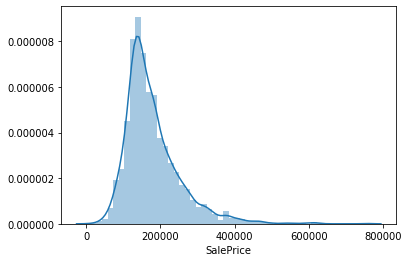

In [3]:
#check saleprice(target value)
sns.distplot(housing['SalePrice'])

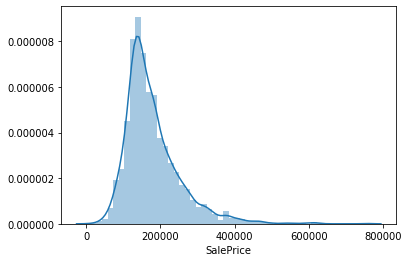

In [4]:

sns.distplot(housing['SalePrice']);

In [5]:
all_na = (housing.isnull().sum() / len(housing)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.651163
MiscFeature,96.240310
Alley,93.488372
Fence,79.651163
FireplaceQu,48.100775
LotFrontage,17.906977
GarageYrBlt,5.000000
GarageCond,5.000000
GarageQual,5.000000
GarageFinish,5.000000


Text(0.5, 1.0, 'Percent missing data by feature')

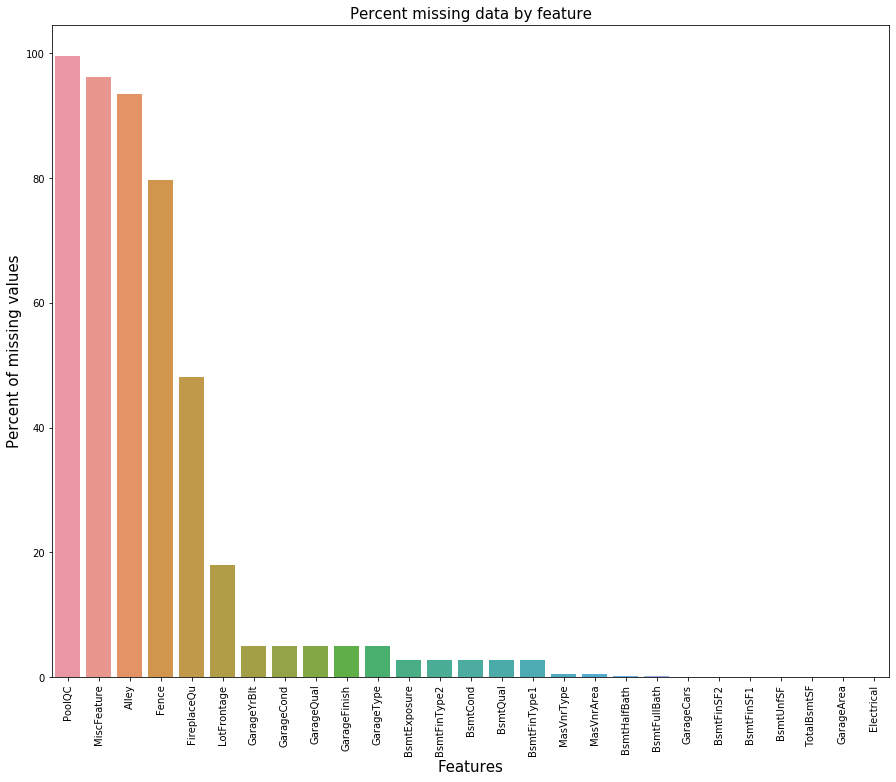

In [6]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Features cleaning

### PoolQC

In [7]:
housing["PoolQC"].value_counts()

TA    3
Gd    2
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [8]:
housing["PoolQC"] = housing["PoolQC"].fillna("None")
housing["PoolQC"].value_counts()

None    2571
TA         3
Gd         2
Fa         2
Ex         2
Name: PoolQC, dtype: int64

### MiscFeature

In [9]:
housing["MiscFeature"].value_counts()

Shed    88
Gar2     5
Othr     3
TenC     1
Name: MiscFeature, dtype: int64

In [10]:
housing["MiscFeature"] = housing["MiscFeature"].fillna("None")
housing["MiscFeature"].value_counts()

None    2483
Shed      88
Gar2       5
Othr       3
TenC       1
Name: MiscFeature, dtype: int64

### Alley

In [11]:
housing["Alley"].value_counts()

Grvl    105
Pave     63
Name: Alley, dtype: int64

In [12]:
housing["Alley"] = housing["Alley"].fillna("None")
housing["Alley"].value_counts()

None    2412
Grvl     105
Pave      63
Name: Alley, dtype: int64

### Fence

In [13]:
housing["Fence"].value_counts()

MnPrv    301
GdPrv    111
GdWo     103
MnWw      10
Name: Fence, dtype: int64

In [14]:
housing["Fence"] = housing["Fence"].fillna("None")
housing["Fence"].value_counts()

None     2055
MnPrv     301
GdPrv     111
GdWo      103
MnWw       10
Name: Fence, dtype: int64

### FireplaceQu

In [15]:
housing["FireplaceQu"].value_counts()

Gd    619
TA    572
Fa     70
Po     43
Ex     35
Name: FireplaceQu, dtype: int64

In [16]:
housing["FireplaceQu"] = housing["FireplaceQu"].fillna("None")
housing["FireplaceQu"].value_counts()

None    1241
Gd       619
TA       572
Fa        70
Po        43
Ex        35
Name: FireplaceQu, dtype: int64

### LotFrontage

In [17]:
#LotFrontage: Linear feet of street connected to property
#fill with medium of neighborhood's LotFrontage
housing["LotFrontage"].describe()

count    2118.000000
mean       68.516053
std        22.835831
min        21.000000
25%        57.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
housing["LotFrontage"].fillna(housing.groupby("Neighborhood")["LotFrontage"].transform("median"), inplace=True)
housing[["Neighborhood","LotFrontage"]].head(30)

,Neighborhood,LotFrontage
1,SWISU,60.0
2,Edwards,42.0
3,IDOTRR,60.0
4,OldTown,80.0
5,NWAmes,70.0
6,Edwards,64.0
7,OldTown,60.0
8,Blmngtn,53.0
9,Mitchel,74.0
10,Edwards,35.0


### GarageYrBlt, GarageType, GarageCars, GarageArea, GarageQual, GarageCond, GarageFinish

In [19]:
housing[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head() 

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
1,1939.0,Detchd,2.0,399.0,TA,TA,Unf
2,1984.0,Attchd,1.0,266.0,TA,TA,Fin
3,1930.0,Detchd,1.0,216.0,TA,Po,Unf
4,1940.0,Detchd,1.0,281.0,TA,TA,Unf
5,2001.0,Attchd,2.0,528.0,TA,TA,Fin


In [20]:
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna("None")
housing['GarageType'] = housing['GarageType'].fillna("None")
housing['GarageQual'] = housing['GarageQual'].fillna("None")
housing['GarageCond'] = housing['GarageCond'].fillna("None")
housing['GarageFinish'] = housing['GarageFinish'].fillna("None")
housing['GarageCars'] = housing['GarageCars'].fillna(0)
housing['GarageArea'] = housing['GarageArea'].fillna(0)

In [21]:
housing[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head()

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
1,1939,Detchd,2.0,399.0,TA,TA,Unf
2,1984,Attchd,1.0,266.0,TA,TA,Fin
3,1930,Detchd,1.0,216.0,TA,Po,Unf
4,1940,Detchd,1.0,281.0,TA,TA,Unf
5,2001,Attchd,2.0,528.0,TA,TA,Fin


### BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual, BsmtFullBath, BsmtHalfBath,TotalBsmtSF, BsmtFinSF1,BsmtFinSF2,BsmtUnfSF

In [22]:
#check null values

housing[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].head(20) 

#if one col is null, all of these columns are null

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
1,Unf,No,Rec,TA,TA,1.0,0.0,856.0,238.0,0.0,618.0
2,ALQ,Mn,GLQ,TA,Gd,1.0,0.0,1049.0,552.0,393.0,104.0
3,Unf,No,ALQ,TA,TA,0.0,0.0,837.0,737.0,0.0,100.0
4,Unf,No,Unf,TA,Fa,0.0,0.0,405.0,0.0,0.0,405.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,810.0,643.0,0.0,167.0
6,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
7,Unf,No,Unf,TA,Fa,0.0,0.0,936.0,0.0,0.0,936.0
8,Unf,Gd,Unf,TA,Gd,0.0,0.0,1146.0,0.0,0.0,1146.0
9,Unf,No,ALQ,TA,TA,0.0,0.0,864.0,647.0,0.0,217.0
10,Unf,Gd,GLQ,TA,Gd,1.0,0.0,547.0,467.0,0.0,80.0


In [23]:
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna("None")
housing['BsmtExposure'] = housing['BsmtExposure'].fillna("None")
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna("None")
housing['BsmtCond'] = housing['BsmtCond'].fillna("None")
housing['BsmtQual'] = housing['BsmtQual'].fillna("None")
housing['BsmtFullBath'] = housing['BsmtFullBath'].fillna(0)
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].fillna(0)
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinSF2'] = housing['BsmtFinSF2'].fillna(0)
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0)

In [24]:
housing[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF']].head(20) 

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
1,Unf,No,Rec,TA,TA,1.0,0.0,856.0
2,ALQ,Mn,GLQ,TA,Gd,1.0,0.0,1049.0
3,Unf,No,ALQ,TA,TA,0.0,0.0,837.0
4,Unf,No,Unf,TA,Fa,0.0,0.0,405.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,810.0
6,None,None,None,None,None,0.0,0.0,0.0
7,Unf,No,Unf,TA,Fa,0.0,0.0,936.0
8,Unf,Gd,Unf,TA,Gd,0.0,0.0,1146.0
9,Unf,No,ALQ,TA,TA,0.0,0.0,864.0
10,Unf,Gd,GLQ,TA,Gd,1.0,0.0,547.0


### MasVnrArea, MasVnrType

In [25]:
# 0 MasVnrArea means no Masonry veneer
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
housing['MasVnrType'] = housing['MasVnrType'].fillna("None")

In [26]:
housing['MasVnrArea'].value_counts()

0.0      1568
120.0      13
216.0      11
108.0      10
176.0      10
         ... 
647.0       1
549.0       1
262.0       1
668.0       1
402.0       1
Name: MasVnrArea, Length: 416, dtype: int64

In [27]:
housing['MasVnrType'].value_counts() 

None       1573
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64

### Electrical

In [28]:
#only one null value of electrical
housing['Electrical'].value_counts() #SBrkr is most frequent value so we fill null as SBrkr

SBrkr    2365
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64

In [29]:
housing['Electrical'] = housing['Electrical'].fillna("SBrkr")

### MSZoning

In [30]:
housing['MSZoning'].value_counts()

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

In [31]:
#fill Nan with RL which is most frequent value
housing['MSZoning'] = housing['MSZoning'].fillna("RL")

In [32]:
housing['MSZoning'].value_counts()

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

### Utilities

In [33]:
housing['Utilities'].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

In [34]:
#fill Nan with Allpub which is most frequent value 
housing['Utilities'] = housing['Utilities'].fillna("AllPub")

In [35]:
housing['Utilities'].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

### Functional

In [36]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [37]:
#fill Nan with Typ which is most frequent value
housing['Functional'] = housing['Functional'].fillna("Typ")

In [38]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

### SaleType

In [39]:
housing['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

In [40]:
housing['SaleType'] = housing['SaleType'].fillna("WD")
housing['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

### KitchenQual

In [41]:
housing['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

In [42]:
housing['KitchenQual'] = housing['KitchenQual'].fillna("TA")

In [43]:
housing['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

### Exterior1st and Exterior2nd

In [44]:
housing['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
AsphShn      2
CBlock       2
PreCast      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [45]:
housing['Exterior1st'] = housing['Exterior1st'].fillna("VinylSd")
housing['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
AsphShn      2
CBlock       2
PreCast      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [46]:
housing['Exterior2nd'].value_counts()

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     97
Wd Shng     76
BrkFace     46
Stucco      37
AsbShng     31
Brk Cmn     21
ImStucc     13
AsphShn      4
Stone        4
CBlock       3
PreCast      1
Name: Exterior2nd, dtype: int64

In [47]:
housing['Exterior2nd'] = housing['Exterior2nd'].fillna("VinylSd")
housing['Exterior2nd'].value_counts()

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     97
Wd Shng     76
BrkFace     46
Stucco      37
AsbShng     31
Brk Cmn     21
ImStucc     13
AsphShn      4
Stone        4
CBlock       3
PreCast      1
Name: Exterior2nd, dtype: int64

### Check every features

In [48]:
#check null values 
all_na = (housing.isnull().sum() / len(housing)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

,Missing Ratio
LotFrontage,0.116279


### Utilities

In [49]:
housing["Utilities"].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

In [50]:
# Since Utilities feature have almost same value, so we better remove it
housing.drop('Utilities', axis=1, inplace=True)

### Correlation

In [51]:
corr = housing.corr(method='pearson').drop(['SalePrice']).sort_values('SalePrice', ascending=False)['SalePrice']
corr 

OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652494
1stFlrSF         0.642613
GarageCars       0.638424
GarageArea       0.634669
YearBuilt        0.544370
FullBath         0.534982
YearRemodAdd     0.514309
MasVnrArea       0.498432
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.461070
LotFrontage      0.354196
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.290755
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
BsmtUnfSF        0.168060
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022668
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033786
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
PID             -0.226276
Name: SalePrice, dtype: float64

In [52]:
# we better delete correlation range from -0.1 ~ 0.1 but will see after result from it
housing.drop('3SsnPorch', axis=1, inplace=True)
housing.drop('PoolArea', axis=1, inplace=True)
housing.drop('BsmtFinSF2', axis=1, inplace=True)
housing.drop('MoSold', axis=1, inplace=True)
housing.drop('YrSold', axis=1, inplace=True)
housing.drop('MiscVal', axis=1, inplace=True)
housing.drop('BsmtHalfBath', axis=1, inplace=True)
housing.drop('LowQualFinSF', axis=1, inplace=True)
housing.drop('OverallCond', axis=1, inplace=True)
housing.drop('MSSubClass', axis=1, inplace=True)

In [53]:
housing.shape #delete 10 cols

(2580, 70)

In [54]:
housing.columns


Index(['PID', 'GrLivArea', 'SalePrice', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolQC', 

In [55]:
#get the numeric values
numeric_features = housing.dtypes[housing.dtypes != "object"].index
numeric_features

Index(['PID', 'GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch'],
      dtype='object')

In [56]:
# Check the skew of all numerical features
skewed_feats = housing[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
LotArea,13.065941
KitchenAbvGr,4.528610
EnclosedPorch,4.039450
ScreenPorch,3.988307
MasVnrArea,2.672562
OpenPorchSF,2.603783
WoodDeckSF,1.845948
SalePrice,1.759778
LotFrontage,1.137707
1stFlrSF,1.043104


In [57]:
skewness = skewness[abs(skewness)>0.5]
housing[skewness.index] = np.log1p(housing[skewness.index])

In [58]:
# Check the skew of all numerical features

skewed_feats = housing[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
KitchenAbvGr,3.849935
ScreenPorch,2.947830
EnclosedPorch,1.942695
HalfBath,0.573839
MasVnrArea,0.554752
BsmtFullBath,0.372438
2ndFlrSF,0.287925
Fireplaces,0.223013
WoodDeckSF,0.143206
PID,0.051365


In [59]:
housing.head()

,PID,GrLivArea,SalePrice,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,20.628049,6.753438,11.744045,RL,4.110874,8.973478,Pave,None,Reg,Lvl,...,Y,0.000000,0.000000,0.000000,5.117994,None,None,None,WD,Normal
2,20.623972,6.956545,11.845827,RL,3.761200,8.351375,Pave,None,Reg,Lvl,...,Y,0.000000,4.663439,0.000000,0.000000,None,None,None,WD,Normal
3,20.630194,6.909753,11.735277,C (all),4.110874,8.709630,Pave,None,Reg,Lvl,...,N,5.043425,0.000000,3.761200,0.000000,None,None,None,WD,Normal
4,20.098482,6.946976,11.643962,RL,4.394449,9.005405,Pave,None,Reg,Lvl,...,N,0.000000,0.000000,5.129899,4.718499,None,None,None,WD,Normal
5,20.096238,7.418181,12.332710,RL,4.262680,9.036106,Pave,None,Reg,Lvl,...,Y,0.000000,3.828641,0.000000,0.000000,None,None,None,WD,Normal


In [60]:
categorical_features = housing.dtypes[housing.dtypes == "object"].index
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [61]:
# process columns, apply LabelEncoder to categorical features
for categorical in categorical_features:
    lbl = LabelEncoder() 
    lbl.fit(list(housing[categorical].values)) 
    housing[categorical] = lbl.transform(list(housing[categorical].values))

# shape        
housing.shape

(2580, 70)

In [62]:
housing = pd.get_dummies(data=housing, columns = categorical_features)
housing.fillna(0, inplace = True)
print(housing.shape)

(2580, 400)


# Modeling

In [63]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

In [64]:
x = pd.DataFrame(housing, columns = housing.columns)
x

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_6,SaleType_7,SaleType_8,SaleType_9,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
1,20.628049,6.753438,11.744045,4.110874,8.973478,1.945910,7.570443,7.576097,0.000000,5.476464,...,0,0,0,1,0,0,0,0,1,0
2,20.623972,6.956545,11.845827,3.761200,8.351375,1.791759,7.593374,7.593374,5.010635,6.315358,...,0,0,0,1,0,0,0,0,1,0
3,20.630194,6.909753,11.735277,4.110874,8.709630,1.791759,7.565793,7.604894,0.000000,6.603944,...,0,0,0,1,0,0,0,0,1,0
4,20.098482,6.946976,11.643962,4.394449,9.005405,1.609438,7.550135,7.602900,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
5,20.096238,7.418181,12.332710,4.262680,9.036106,2.197225,7.601902,7.601902,0.000000,6.467699,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,20.621460,6.859615,11.703554,3.960813,9.088738,1.945910,7.558517,7.576097,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
760,20.623890,7.458186,11.846544,4.189655,9.523763,1.386294,7.578657,7.578657,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
761,20.628158,7.602401,11.884496,4.418841,8.743691,1.791759,7.575585,7.576097,0.000000,5.652489,...,0,0,0,1,0,0,0,0,1,0
762,20.625865,7.519150,12.289959,4.262680,9.085570,2.079442,7.601402,7.601402,4.976734,6.735780,...,0,0,0,1,0,0,0,0,1,0


In [65]:
y = pd.DataFrame(housing, columns = ["SalePrice"])
y

,SalePrice
1,11.744045
2,11.845827
3,11.735277
4,11.643962
5,12.332710
...,...
759,11.703554
760,11.846544
761,11.884496
762,12.289959


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [67]:
# Setting for K-fold cross validation
# Since this is not calssification, we can not use accuracy for scoring.
# So, we have to use RMSE to check acuarcy of the model
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [68]:
# This model may be very sensitive to outliers. So we need to made it more robust on them. 
# For that we use the sklearn's Robustscaler() method on pipeline
# LASSO Regression

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=3))

In [69]:
# Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [70]:
# Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) #kernel = 'rbf' , 'sigmoid' 

In [71]:
# With huber loss that makes it robust to outliers
# Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [72]:
# XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [73]:
# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [74]:
# Support Vector Regressor
model_svr = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [75]:
# ____Grid search for SVR
params = {'coef0':[0, 0.1, 0.5, 1], 'C' :[0.1, 0.2, 0.5, 1], 'epsilon':[i/10.0 for i in range(0,6)]}
#model_svr = SVR()
#grid_search = GridSearchCV(model_svr, params, cv=10, scoring='neg_mean_squared_error')
#grid_search.fit(train, y_train)

In [76]:
#grid_search.best_estimator_

In [77]:
# Random Forest Regressor
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=150, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
# ____Grid search for RF
param_grid = [
    {'n_estimators': [3, 10, 30, 60, 90], 'max_features': [50,100,150,200,250,300]},
    {'bootstrap': [True], 'n_estimators': [3, 10, 30, 60, 90], 'max_features': [50,100,150,200,250]},
]

#forest_reg = RandomForestRegressor()
#grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
#grid_search.fit(train, y_train)

# Model scores

In [79]:
# lasso scores
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0006 (0.0000)



In [80]:
# Elastic Net Regression scores
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0006 (0.0000)



In [81]:
# Kernel Ridge Regression scores
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0508 (0.0030)



In [82]:
# Gradient Boosting Regression scores
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Gradient Boosting score: 0.0613 (0.0052)



In [83]:
# XGBoost scores
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[11:20:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:20:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

In [84]:
# LightGBM scores
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

LGBM score: 0.0564 (0.0073)



In [85]:
# Support Vector Regressor
score = rmsle_cv(model_svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

SVR score: 0.0562 (0.0035)



In [86]:
# RF Regressor
score = rmsle_cv(regr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

SVR score: 0.0367 (0.0062)



# Prediction

In [87]:
#define a rmsle evaluation function

def rmsle(y, y_pred): 
    return np.sqrt(mean_squared_error(y, y_pred))

In [89]:
# XGBoost
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(x_test))
print(rmsle(y_train, xgb_train_pred))

[11:27:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.0365324313045266


In [90]:
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(x_test.values))
print(rmsle(y_train, lgb_train_pred))

0.040966661210435906


In [91]:
# Gradient Boosting Regression
GBoost.fit(x_train,y_train)
GB_train_pred = GBoost.predict(x_train)
GB_pred = np.expm1(GBoost.predict(x_test.values))
print(rmsle(y_train, GB_train_pred))

C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.02433092315115099


In [92]:
# Elastic Net Regression
ENet.fit(x_train,y_train)
ENet_train_pred = ENet.predict(x_train)
ENet_pred = np.expm1(ENet.predict(x_test.values))
print(rmsle(y_train, ENet_train_pred))

0.0006114732603096962
